# Linear Regression with Python Scikit Learn

In this section we will see how the python Scikit-Learn library for machine learning can be used to implement regression functions.We will start with simple linear regression involving two variables.

# Simple Linear Regression

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.This is a simple linear regression task as it involves just two variables.

In [52]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

In [53]:
# Reading data from remote link
url="http://bit.ly/w-data"
s_data=pd.read_csv(url)
print("Data imported successfully")

s_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Let's plot our data points on 2_D graph to eyeball our dataset and see if we can manually find any relationship between the data.We can create the plot with the following script:

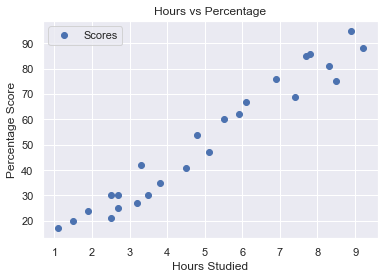

In [54]:
# Plotting the distribution of scores
s_data.plot(x = 'Hours', y = 'Scores',style = 'o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

From the graph above we can clearly see that there is a positive linear relation between the number of hours studied and percentage of scores.

# Create the regression

Declare the dependent and independent variable

In [75]:
x = s_data['Hours']
y = s_data['Scores']

In [76]:
x.shape

(25,)

In [77]:
y.shape

(25,)

In [78]:
x_matrix=x.values.reshape(-1,1)
x_matrix.shape

(25, 1)

# Regression itself

In [79]:
reg=LinearRegression()

In [80]:
reg.fit(x_matrix,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# R-Squared

In [82]:
reg.score(x_matrix,y)

0.9529481969048356

# Coefficients

In [83]:
reg.coef_

array([9.77580339])

# Intercepts

In [84]:
reg.intercept_

2.483673405373203

# Making predictions

In [93]:
new_data=pd.DataFrame(data=[9.25], columns=['Hours'])
new_data

,Hours
0,9.25


In [94]:
reg.predict(new_data)

array([92.90985477])

In [95]:
new_data['Predicted Scores']=reg.predict(new_data)
new_data

,Hours,Predicted Scores
0,9.25,92.909855


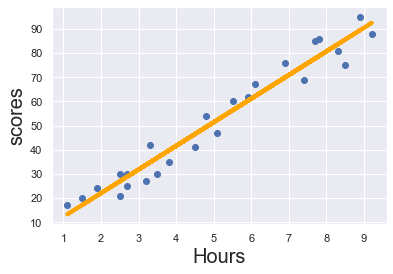

In [92]:
plt.scatter(x,y)
yhat = reg.coef_* x_matrix + reg.intercept_

fig = plt.plot(x,yhat,lw=4,c='orange',label= 'regression line')
plt.xlabel('Hours',fontsize=20)
plt.ylabel('scores',fontsize=20)
plt.show()

# Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [97]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y, yhat)) 

Mean Absolute Error: 4.972805319866374
